In [1]:
%matplotlib inline
#%matplotlib nbagg # JupyterLabでは上手く動かないので今回は使わない。
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.lines as lines
from matplotlib.animation import ArtistAnimation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import sympy as sym
# Jupyter Notebook上で、レンダリングされた結果を表示する
sym.init_printing()

In [34]:
def here_function1(th): 
    x = np.cos(th)
    y = np.sin(th)
    return x, y


start = 0
last = 2*np.pi

dx = 0.1
th = np.arange(start,last+dx, dx)
x, y = here_function1(th)

fig = plt.figure(figsize=(12,4), dpi=150)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.set_aspect('equal')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_position('zero')
ax1.spines['left'].set_position('zero')
ax1.axis([-1.2,1.2,-1.2,1.2])
ax1.grid()

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_position('zero')
ax2.spines['left'].set_position('zero')
ax2.grid()

ax1.plot(x, y, label='circle', color='black')

artist_list = []
point_list_x = []
point_list_sin = []
point_list_cos = []

for i in range(len(x)):
    art = ax.plot(x[i],y[i], marker='.', color='black', markersize=10, linestyle='None')
    art += [ax1.add_line(lines.Line2D([0,x[i]],[0,y[i]], color='black'))]
    art += [ax1.add_line(lines.Line2D([x[i],x[i]],[0,y[i]], color='red'))]
    art += [ax1.add_line(lines.Line2D([0,x[i]],[y[i],y[i]], color='blue'))]

    point_list_x.append(th[i])
    point_list_sin.append(y[i])
    point_list_cos.append(x[i])
    art += ax2.plot(point_list_x,point_list_sin, marker='.', color='red', markersize=8, linestyle='None')
    art += ax2.plot(point_list_x,point_list_cos, marker='.', color='blue', markersize=8, linestyle='None')
    artist_list.append(art)

ax1.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10)
ani = ArtistAnimation(fig, artist_list, interval = 50)

plt.close()
HTML(ani.to_jshtml())


In [35]:
ani.save('./anime-1.mp4', writer="ffmpeg") # mp4で保存

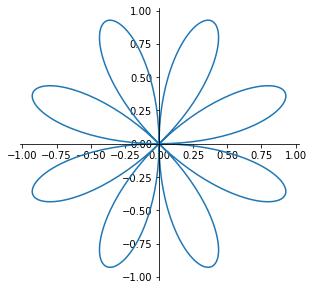

In [36]:
last = 2 * np.pi # 周期の定義

n = 4
k = 1

def rose(th):
    r = np.sin((n/k)*th)
    return r
pcf_to_graph2(rose, last)

In [37]:
def pcf_to_graph3(ax, pcf, last):
    start = 0 #定義域の左端
    #last = 2*np.pi # 定義域の右端 # コメントアウト
    
    def here_function1(f, th): 
        r = f(th)
        x = r * np.cos(th) # 極座標からの変換(x座標の抽出)
        y = r * np.sin(th) # 極座標からの変換(y座標の抽出)
        return x, y

    th = np.arange(start,last, 0.01)
    x, y = here_function1(pcf, th)

    #fig = plt.figure(figsize=(5,5)) # サイズを均等に
    #ax = fig.add_subplot(1,1,1)
    #ax.set_aspect('equal')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.axis([-1.1,1.1,-1.1,1.1]) # コメントアウト
    #ax.grid() # グラフにグリッドを追加

    ax.plot(x, y) # 描画
    #ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映


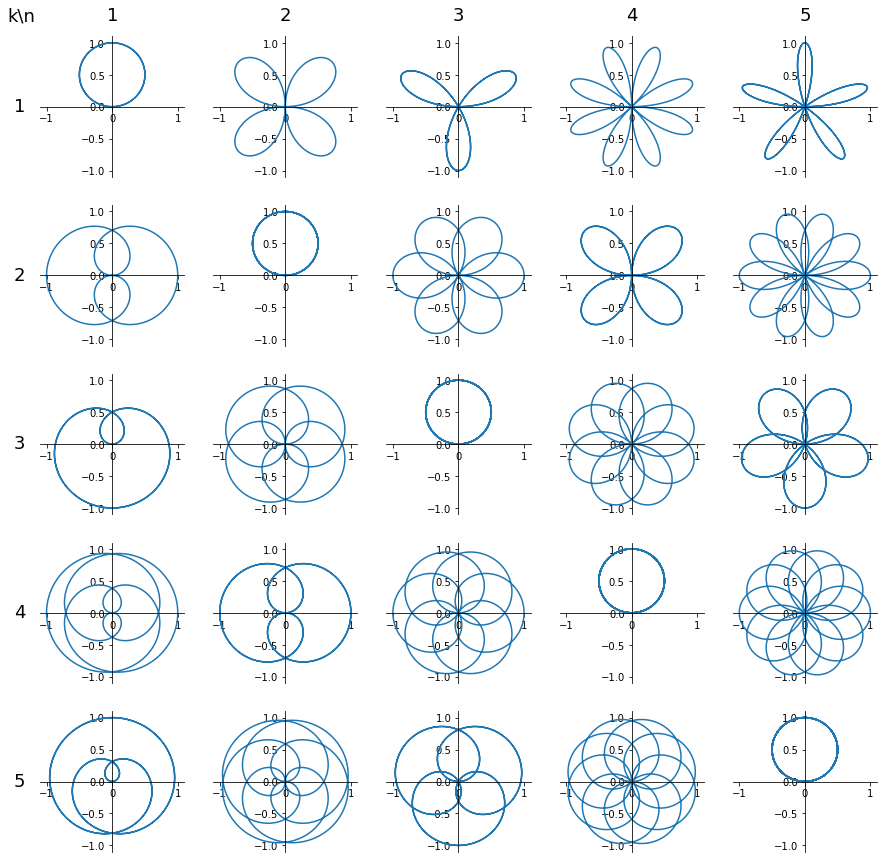

In [38]:
fig = plt.figure(figsize=(15,15)) # サイズを均等に

for i in range(1, 6):
    last = 2 * np.pi * i
    for j in range(1, 6):
        ax = fig.add_subplot(5,5,(i-1)*5+j)
        if i == 1 and j == 1:
            ax.text(-1.6, 1.35, r'k\n', fontsize=18)
        if i == 1:
            ax.text(-0.085, 1.35, j, fontsize=18)
        if j == 1:
            ax.text(-1.5, -0.07, i, fontsize=18)
        def rose(th):
            r = np.sin((j/i)*th)
            return r
        pcf_to_graph3(ax, rose, last)

In [39]:
fig.savefig('rose_curve.svg', facecolor='sandybrown')

In [3]:
import matplotlib.patches as patches

In [7]:
def here_function1(th): 
    x = np.cos(th)
    y = np.sin(th)
    return x, y

def here_function2(th):
    x = (r_c - r_m) * np.cos(th) + r_d * np.cos((r_c - r_m) * th / r_m)
    y = (r_c - r_m) * np.sin(th) - r_d * np.sin((r_c - r_m) * th / r_m)
    return x, y

r_c = 5
r_m = 3
r_d = 5
start = 0 #定義域の左端
last = 6*np.pi # 定義域の右端

dx = 0.1
th = np.arange(start,last+dx, dx)
x1, y1 = here_function1(th)
x2, y2 = here_function1(th)
x2 *= r_m
y2 *= r_m
x3, y3 = here_function2(th)

fig = plt.figure(figsize=(4,4)) # サイズを均等に
ax = fig.add_subplot(1,1,1)
#ax.set_aspect('equal')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
# ax.axis([-1.2,1.2,-1.2,1.2])
#ax.grid() # グラフにグリッドを追加

ax.plot(x1, y1, label='circle', color='blue') # 描画

A = np.array([[np.cos(dx), -np.sin(dx)],
              [np.sin(dx), np.cos(dx)]])

artist_list = []
for i in range(len(th)):
    x = (r_c-r_m)*np.cos(th[i])
    y = (r_c-r_m)*np.sin(th[i])
    x2, y2 = np.dot(A, [x2, y2])
    art = ax.plot(x2,y2, color='red') # 点
    art += [ax.add_line(lines.Line2D([x,x3[i]],[y,y3[i]], color='black'))]
    art += ax.plot(x3[:i+1],y3[:i+1], color='red') # 点

    artist_list.append(art)

ax.legend(bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0, fontsize=10) # ラベルの反映
ani = ArtistAnimation(fig, artist_list, interval = 50)

plt.close()
HTML(ani.to_jshtml())

In [42]:
ani.save('./anime-3.mp4', writer="ffmpeg")